<a href="https://colab.research.google.com/github/Karsang-Chhombay-sherpa/Concept-and-Technology-of-AI/blob/main/2431330_Karsang_Chhombay_Sherpa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1: problem 3.1
Data Exploration and Understanding:
    • Dataset Overview:


In [ ]:
#loading dataset & first 10 rows
df=pd.read_csv("/content/drive/MyDrive/WHR-2024-5CS037.csv")
df.head(10)

,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524,1.658
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193,2.298
5,Netherlands,7.319,1.901,1.462,0.706,0.725,0.247,0.372,1.906
6,Norway,7.302,1.952,1.517,0.704,0.835,0.224,0.484,1.586
7,Luxembourg,7.122,2.141,1.355,0.708,0.801,0.146,0.432,1.540
8,Switzerland,7.060,1.970,1.425,0.747,0.759,0.173,0.498,1.488
9,Australia,7.057,1.854,1.461,0.692,0.756,0.225,0.323,1.745


In [ ]:
# Identify the number of rows and columns
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

Number of rows: 143, Number of columns: 9


In [ ]:
# List all columns and their data types
print("\nColumns and their data types:")
df.dtypes


Columns and their data types:


,0
Country name,object
score,float64
Log GDP per capita,float64
Social support,float64
Healthy life expectancy,float64
Freedom to make life choices,float64
Generosity,float64
Perceptions of corruption,float64
Dystopia + residual,float64


• Basic Statistics:

In [ ]:
# Calculate mean, median, and standard deviation for the Score column
print(f"Mean Score: {df['score'].mean()}")
print(f"Median Score: {df['score'].median()}")
print(f"Standard Deviation of score: {df['score'].std()}")


Mean Score: 5.52758041958042
Median Score: 5.785
Standard Deviation of score: 1.1707165099442995


In [ ]:
# Country with the highest and lowest happiness scores
print("\nCountry with the Highest and Lowest Happiness Scores:")
highest_score = df.loc[df['score'].idxmax()]
lowest_score = df.loc[df['score'].idxmin()]
print(f"Highest Score: {highest_score['Country name']} - {highest_score['score']}")
print(f"Lowest Score: {lowest_score['Country name']} - {lowest_score['score']}")


Country with the Highest and Lowest Happiness Scores:
Highest Score: Finland - 7.741
Lowest Score: Afghanistan - 1.721


Missing Values:

In [ ]:
# Check for missing values
missing_values = df.isnull().sum()
print("\nMissing values in the dataset:\n")
print(missing_values[missing_values > 0])



Missing values in the dataset:

Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


• Filtering and Sorting:

In [ ]:
# Filter countries with a Score > 7.5 and sort by log GDP per Capita
filtered_df = df[df['score'] > 7.5]
sorted_df = filtered_df.sort_values(by='Log GDP per capita', ascending=False)
print("\nTop 10 Rows (Filtered and Sorted by GDP per Capita):")
sorted_df.head(10)


Top 10 Rows (Filtered and Sorted by GDP per Capita):


,Country name,score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548,1.881
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182,2.050
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546,2.082


• Adding New Columns:


In [ ]:
# Add Happiness Category column
def categorize_happiness(score):
    if score < 4:
        return 'Low'
    elif 4 <= score <= 6:
        return 'Medium'
    else:
        return 'High'

df['Happiness Category'] = df['score'].apply(categorize_happiness)
print("\nHappiness Category added:")
print(df[['Country name', 'score', 'Happiness Category']].head(10))


Happiness Category added:
  Country name  score Happiness Category
0      Finland  7.741               High
1      Denmark  7.583               High
2      Iceland  7.525               High
3       Sweden  7.344               High
4       Israel  7.341               High
5  Netherlands  7.319               High
6       Norway  7.302               High
7   Luxembourg  7.122               High
8  Switzerland  7.060               High
9    Australia  7.057               High


2. Data Visualizations:

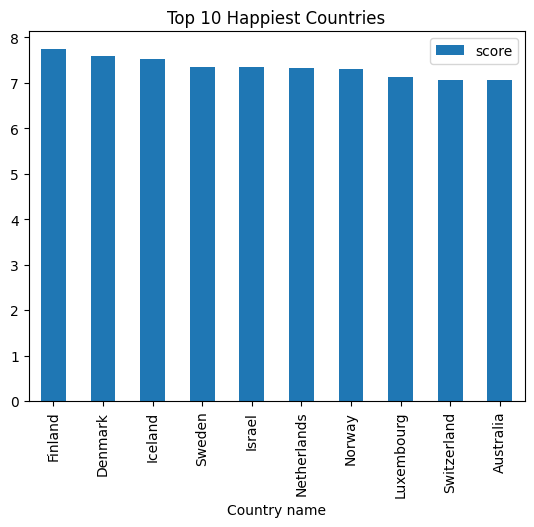

In [ ]:
# Bar Plot: Top 10 happiest countries
happiest = df.nlargest(10, 'score')
happiest.plot(x='Country name', y='score', kind='bar', title='Top 10 Happiest Countries')
plt.show()

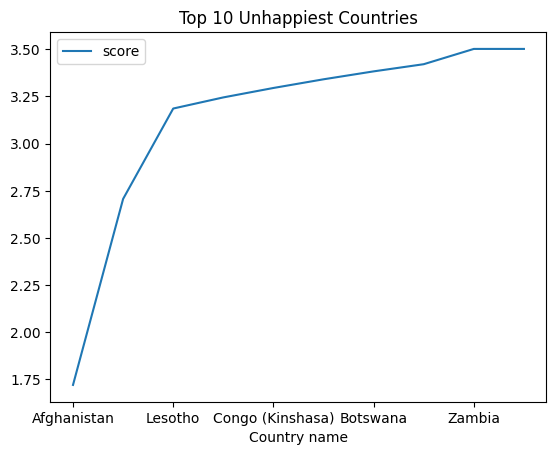

In [ ]:
# Line Plot: Top 10 unhappiest countries
unhappiest = df.nsmallest(10, 'score')
unhappiest.plot(x='Country name', y='score', kind='line', title='Top 10 Unhappiest Countries')
plt.show()


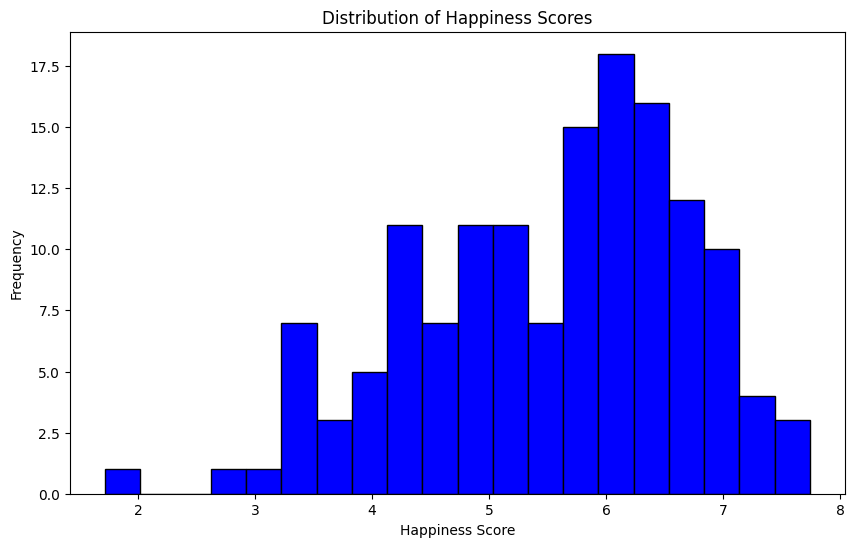

In [ ]:
# Histogram: Distribution of Score
plt.figure(figsize=(10, 6))
plt.hist(df['score'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')
plt.show()

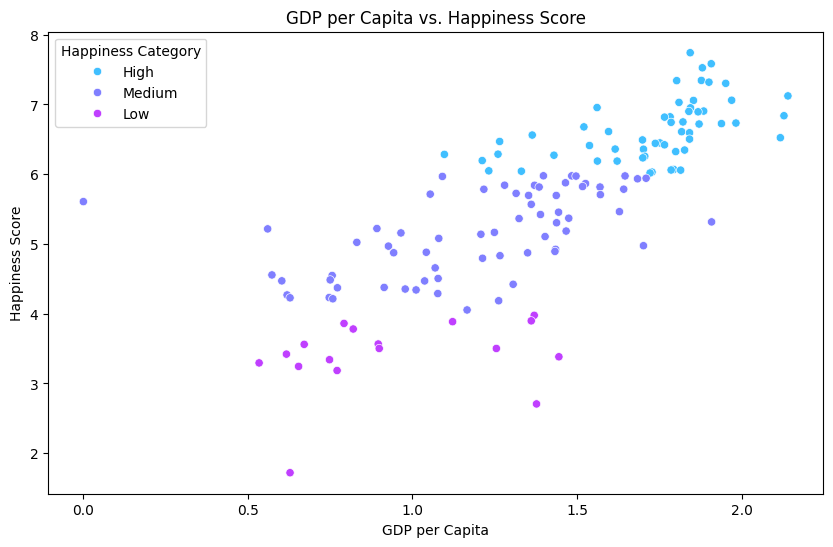

In [ ]:
# Scatter Plot: GDP per Capita vs. Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Log GDP per capita', y='score', data=df, hue='Happiness Category', palette='cool')
plt.title('GDP per Capita vs. Happiness Score')
plt.xlabel('GDP per Capita')
plt.ylabel('Happiness Score')
plt.legend(title='Happiness Category')
plt.show()

#Problem 3.2: Composite Score Ranking

Task - 1 - Setup Task - Preparing the South-Asia Dataset:

In [ ]:
# Task 1: Setup South Asia Dataset
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
south_asia = df[df['Country name'].isin(south_asian_countries)]
print(south_asia)
south_asia.to_csv('South_Asia.csv', index=False)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

Task - 2 - Composite Score Ranking:

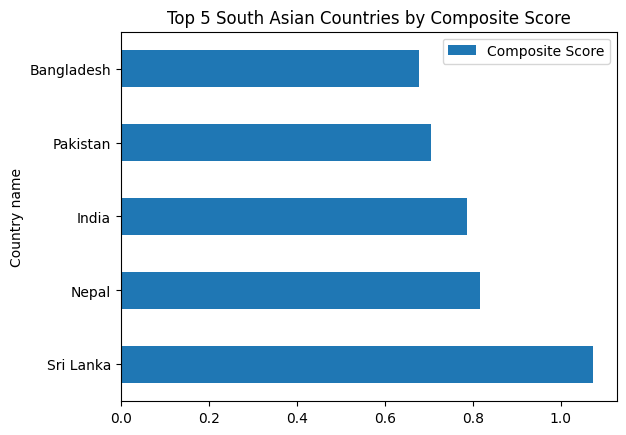

In [105]:
south_asia.loc[:, 'Composite Score'] = (
    0.4 * south_asia['Log GDP per capita'] +
    0.3 * south_asia['Social support'] +
    0.3 * south_asia['Healthy life expectancy']
)

south_asia = south_asia.sort_values(by='Composite Score', ascending=False)

# Visualize top 5 countries by Composite Score
south_asia.nlargest(5, 'Composite Score').plot(x='Country name', y='Composite Score', kind='barh', title='Top 5 South Asian Countries by Composite Score')

plt.show()

Task 3: Outlier Detection

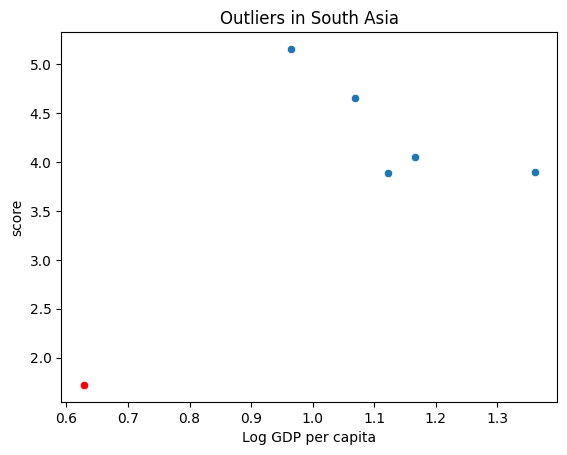

In [ ]:
# Define outliers using the 1.5 IQR rule
q1 = south_asia['score'].quantile(0.25)
q3 = south_asia['score'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = south_asia[(south_asia['score'] < lower_bound) | (south_asia['score'] > upper_bound)]

# Scatter Plot highlighting outliers
sns.scatterplot(data=south_asia, x='Log GDP per capita', y='score')
sns.scatterplot(data=outliers, x='Log GDP per capita', y='score', color='red')
plt.title('Outliers in South Asia')
plt.show()

Task 4: Exploring Trends Across Metrics

Correlation between Freedom to make life choices and score: 0.8005185224163315


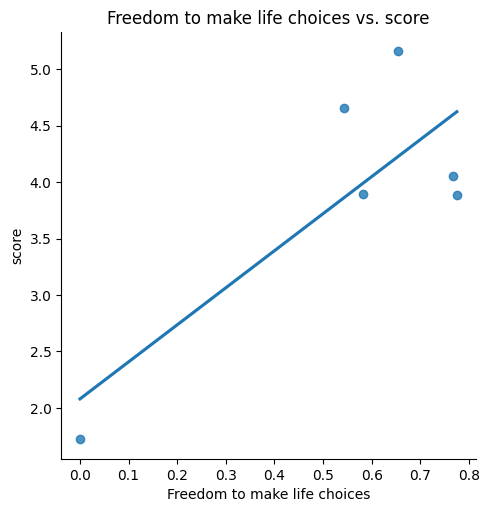

Correlation between Generosity and score: 0.874512371253192


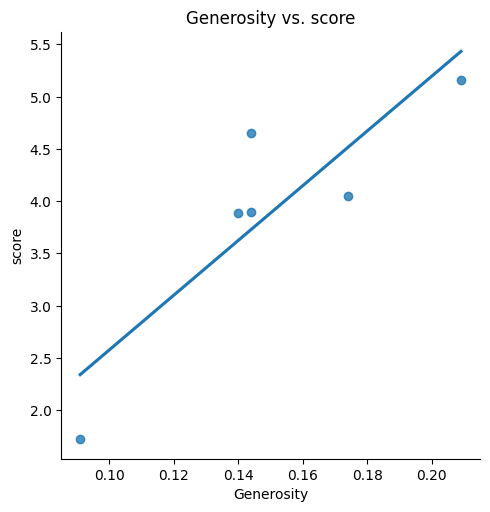

In [ ]:
# Task 4: Exploring Trends Across Metrics
metrics = ['Freedom to make life choices', 'Generosity']
for metric in metrics:
    if metric in south_asia.columns:
        correlation = south_asia[metric].corr(south_asia['score'])
        print(f"Correlation between {metric} and score: {correlation}")
        sns.lmplot(data=south_asia, x=metric, y='score', ci=None)
        plt.title(f'{metric} vs. score')
        plt.show()
    else:
        print(f"Column {metric} is missing for correlation analysis.")

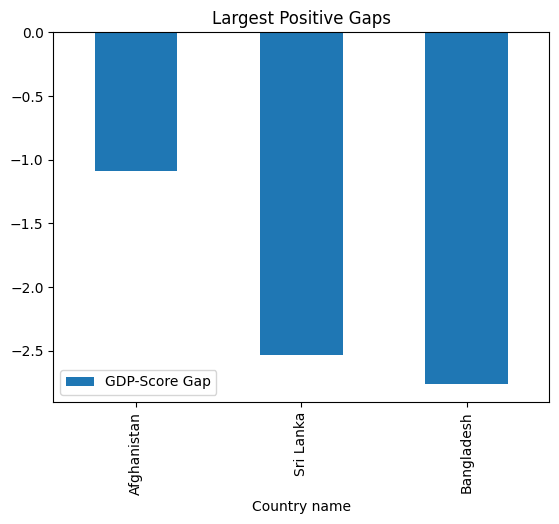

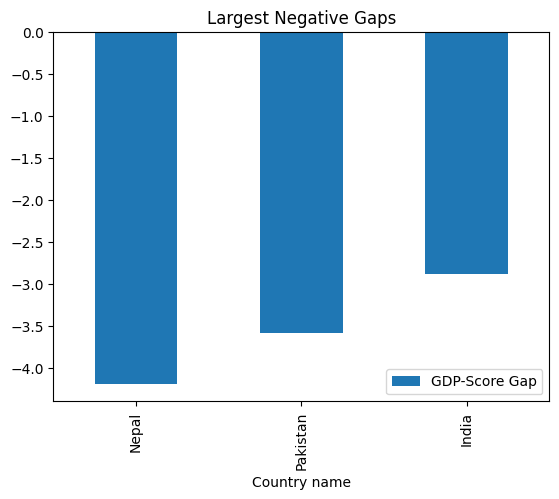

In [ ]:
+# Task 5: Gap Analysis
if 'Log GDP per capita' in south_asia.columns and 'score' in south_asia.columns:
    south_asia['GDP-Score Gap'] = south_asia['Log GDP per capita'] - south_asia['score']
    positive_gaps = south_asia.nlargest(3, 'GDP-Score Gap')
    negative_gaps = south_asia.nsmallest(3, 'GDP-Score Gap')
    positive_gaps.plot(x='Country name', y='GDP-Score Gap', kind='bar', title='Largest Positive Gaps')
    plt.show()
    negative_gaps.plot(x='Country name', y='GDP-Score Gap', kind='bar', title='Largest Negative Gaps')
    plt.show()
else:
    print("Required columns for GDP-Score Gap analysis are missing.")

3.3 Problem - 3 - Comparative Analysis:

South Asia Mean score: 3.895666666666667, Std Dev: 1.1770690152521501
Middle East Mean score: 5.412100000000001, Std Dev: 1.5662011684327144


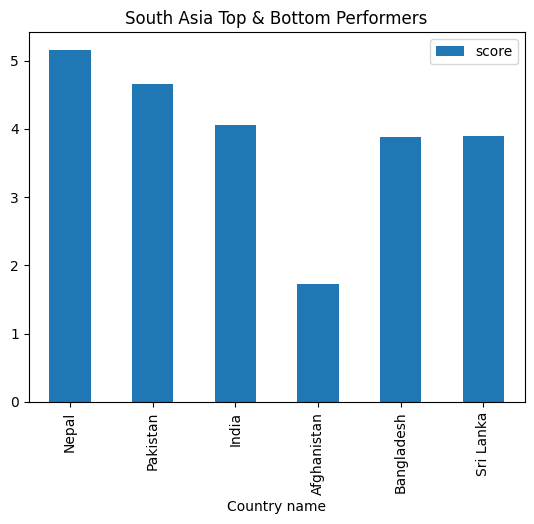

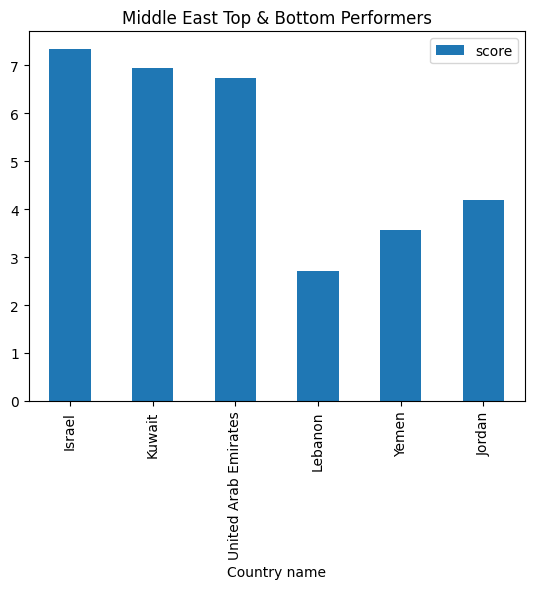

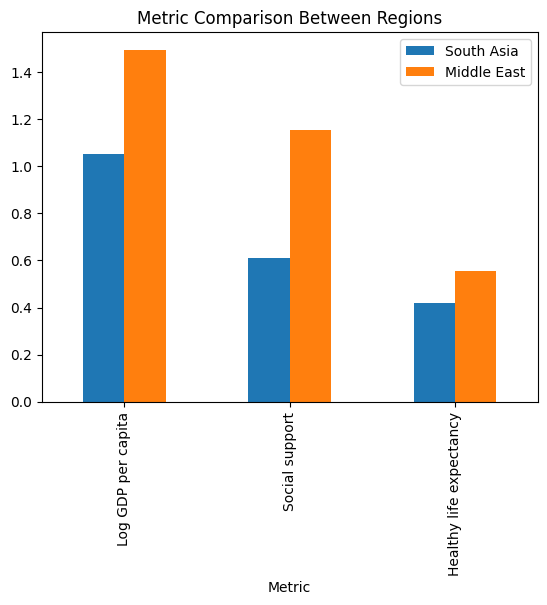

South Asia Range: 3.4370000000000003, Middle East Range: 4.634


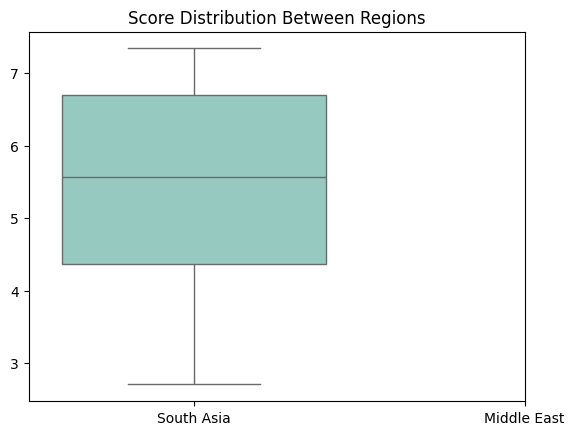

In [ ]:
# Task 1: Setup Middle Eastern Dataset
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east = df[df['Country name'].isin(middle_east_countries)]

# Descriptive Statistics
print(f"South Asia Mean score: {south_asia['score'].mean()}, Std Dev: {south_asia['score'].std()}")
print(f"Middle East Mean score: {middle_east['score'].mean()}, Std Dev: {middle_east['score'].std()}")

# Top and Bottom Performers
south_asia_top_bottom = pd.concat([south_asia.nlargest(3, 'score'), south_asia.nsmallest(3, 'score')])
middle_east_top_bottom = pd.concat([middle_east.nlargest(3, 'score'), middle_east.nsmallest(3, 'score')])

# Visualizations
south_asia_top_bottom.plot(x='Country name', y='score', kind='bar', title='South Asia Top & Bottom Performers')
plt.show()
middle_east_top_bottom.plot(x='Country name', y='score', kind='bar', title='Middle East Top & Bottom Performers')
plt.show()

# Metric Comparisons
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']
comparison = pd.DataFrame({
    'Metric': metrics,
    'South Asia': [south_asia[metric].mean() for metric in metrics if metric in south_asia.columns],
    'Middle East': [middle_east[metric].mean() for metric in metrics if metric in middle_east.columns]
})
comparison.plot(x='Metric', kind='bar', title='Metric Comparison Between Regions')
plt.show()

# Happiness Disparity
if 'score' in south_asia.columns and 'score' in middle_east.columns:
    south_asia_range = south_asia['score'].max() - south_asia['score'].min()
    middle_east_range = middle_east['score'].max() - middle_east['score'].min()
    print(f"South Asia Range: {south_asia_range}, Middle East Range: {middle_east_range}")
    sns.boxplot(data=[south_asia['score'], middle_east['score']], palette='Set3')
    plt.xticks([0, 1], ['South Asia', 'Middle East'])
    plt.title('Score Distribution Between Regions')
    plt.show()
else:
    print("Required columns for happiness disparity analysis are missing.")
